In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as o
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Importando os imóveis em bairros estritamente da Zona Sul
# Os dados abaixo são os adquiridos sem o Q1 da tabela original, considerando apenas bairros com total de imóveis 
# acima do Q1 não normalizado nem padronizado.

dfzs = pd.read_excel(r'tabela_zona_sul.xlsx')
display(dfzs)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,7,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,15,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
3,17,2472227898,Zap Imóveis,Vila Congonhas,Zona Sul,São Paulo,Aluguel,500,1644,4800,145,4,1,2,4,33.10,8.476371,0.441101,3.499533,-0.395533
4,18,2472330983,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,1200,1800,3000,220,4,2,4,3,13.64,8.006368,-0.197160,2.613007,-2.081534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72038,227348,2464749387,Zap Imóveis,Jardim Paulista,Zona Sul,São Paulo,Aluguel,0,450,1700,40,1,0,1,1,42.50,7.438384,-0.968477,3.749504,0.079863
72039,227351,2470534574,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,204,1095,4200,100,2,0,1,2,42.00,8.342840,0.259766,3.737670,0.057356
72040,227352,2458999378,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,110,0,1890,60,2,0,0,1,31.50,7.544332,-0.824600,3.449988,-0.489759
72041,227354,2470862484,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,180,560,3000,51,1,0,1,1,58.82,8.006368,-0.197160,4.074482,0.697907


In [3]:
dfzs = dfzs.drop(columns = ['Unnamed: 0'])
display(dfzs)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
3,2472227898,Zap Imóveis,Vila Congonhas,Zona Sul,São Paulo,Aluguel,500,1644,4800,145,4,1,2,4,33.10,8.476371,0.441101,3.499533,-0.395533
4,2472330983,Zap Imóveis,Bosque da Saúde,Zona Sul,São Paulo,Aluguel,1200,1800,3000,220,4,2,4,3,13.64,8.006368,-0.197160,2.613007,-2.081534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72038,2464749387,Zap Imóveis,Jardim Paulista,Zona Sul,São Paulo,Aluguel,0,450,1700,40,1,0,1,1,42.50,7.438384,-0.968477,3.749504,0.079863
72039,2470534574,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,204,1095,4200,100,2,0,1,2,42.00,8.342840,0.259766,3.737670,0.057356
72040,2458999378,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,110,0,1890,60,2,0,0,1,31.50,7.544332,-0.824600,3.449988,-0.489759
72041,2470862484,Zap Imóveis,Campo Belo,Zona Sul,São Paulo,Aluguel,180,560,3000,51,1,0,1,1,58.82,8.006368,-0.197160,4.074482,0.697907


In [4]:
datazs = dfzs.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['max', 'min', 'mean', 'std', 'size'])
display(datazs)

max    min       mean         std  size
Zona     Bairro                                                         
Zona Sul Aclimação             62.50  13.64  30.189189    8.869385    37
         Alto da Boa Vista    200.00  14.29  48.626667   31.860424    36
         Bela Vista            87.71  31.43  46.800000   17.863720     8
         Bosque da Saúde      107.69   7.69  31.162613   11.277142   999
         Brooklin           16190.48   4.26  66.129511  254.277589  5497
...                              ...    ...        ...         ...   ...
         Vila Vera             86.67  10.87  28.451056    9.005662   142
         Vila Vermelha         49.02  16.92  27.709130    7.598774    46
         Vila da Saúde        116.67  13.49  38.091795   14.371829   557
         Vila do Encontro     100.00   7.65  22.938846    7.961472   615
         Vila Água Funda       47.50   8.80  26.624384    7.233449    73

[73 rows x 5 columns]

In [5]:
dfzs.isna().any().sum()

3

In [6]:
dfzs.dropna(inplace=True)
dfzs.isna().any().sum()

0

In [7]:
# Coletando a mediana e o Q3 da tabela zona sul

mediana = np.percentile(dfzs.Aluguel_m2, 50)
q3 = np.percentile(dfzs.Aluguel_m2, 75)
print(mediana)
print(q3)

42.72
61.22


In [8]:
# Separando os imóveis cujos aluguéis se encontram entre a mediana e o Q3

df___ = dfzs[(dfzs.Aluguel_m2 >= mediana) & (dfzs.Aluguel_m2 <= q3)]
print(df___)

        Id_Oferta       Portal           Bairro      Zona     Cidade   Status  \
0      2469688383  Zap Imóveis         Brooklin  Zona Sul  São Paulo  Aluguel   
1      2470707875  Zap Imóveis  Vila Clementino  Zona Sul  São Paulo  Aluguel   
2      2471846802  Zap Imóveis          Paraíso  Zona Sul  São Paulo  Aluguel   
6      2472894791  Zap Imóveis         Brooklin  Zona Sul  São Paulo  Aluguel   
11     2475393842  Zap Imóveis     Indianópolis  Zona Sul  São Paulo  Aluguel   
...           ...          ...              ...       ...        ...      ...   
72028    93641668  Zap Imóveis       Itaim Bibi  Zona Sul  São Paulo  Aluguel   
72030  2460791409  Zap Imóveis            Moema  Zona Sul  São Paulo  Aluguel   
72034  2460792890  Zap Imóveis            Moema  Zona Sul  São Paulo  Aluguel   
72036  2460793561  Zap Imóveis       Itaim Bibi  Zona Sul  São Paulo  Aluguel   
72041  2470862484  Zap Imóveis       Campo Belo  Zona Sul  São Paulo  Aluguel   

       Valor_Iptu  Valor_Co

In [9]:
# Transformando num dataframe legível

df_a = pd.DataFrame(data=df___)
display(df_a)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
6,2472894791,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,870,1350,9000,198,3,3,4,5,45.45,9.104980,1.294745,3.816613,0.207490
11,2475393842,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,500,1900,9000,160,2,1,1,1,56.25,9.104980,1.294745,4.029806,0.612943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72028,93641668,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,2100,3700,12000,216,3,3,4,6,55.56,9.392662,1.685415,4.017464,0.589469
72030,2460791409,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,885,2636,10200,200,4,3,3,4,51.00,9.230143,1.464716,3.931826,0.426603
72034,2460792890,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,667,2600,11500,198,3,3,2,4,58.08,9.350102,1.627619,4.061821,0.673829
72036,2460793561,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,202,2406,2003,42,1,1,1,1,47.69,7.602401,-0.745742,3.864722,0.298984


In [10]:
# Agrupando as métricas básicas dos Bairros da zona sul

datatable1 = df_a.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable1)

min    max       mean       std  size
Zona     Bairro                                                    
Zona Sul Alto da Boa Vista  45.95  59.68  52.854000  4.711148    10
         Bela Vista         42.86  55.56  49.210000  8.980256     2
         Bosque da Saúde    42.86  59.12  48.691345  4.476564   119
         Brooklin           42.74  61.22  52.860204  5.453796  1568
         Brooklin Novo      46.00  59.18  49.200000  5.593818     5
...                           ...    ...        ...       ...   ...
         Vila Vera          43.06  48.00  44.667500  2.330055     4
         Vila Vermelha      43.40  49.02  46.210000  3.973940     2
         Vila da Saúde      42.86  61.14  50.633421  5.700617   114
         Vila do Encontro   43.59  60.00  51.306250  4.469755     8
         Vila Água Funda    47.50  47.50  47.500000       NaN     1

[68 rows x 5 columns]

In [11]:
# Tratando os NaN

datatable1.replace(np.nan, 0, inplace=True)
display(datatable1)

min    max       mean       std  size
Zona     Bairro                                                    
Zona Sul Alto da Boa Vista  45.95  59.68  52.854000  4.711148    10
         Bela Vista         42.86  55.56  49.210000  8.980256     2
         Bosque da Saúde    42.86  59.12  48.691345  4.476564   119
         Brooklin           42.74  61.22  52.860204  5.453796  1568
         Brooklin Novo      46.00  59.18  49.200000  5.593818     5
...                           ...    ...        ...       ...   ...
         Vila Vera          43.06  48.00  44.667500  2.330055     4
         Vila Vermelha      43.40  49.02  46.210000  3.973940     2
         Vila da Saúde      42.86  61.14  50.633421  5.700617   114
         Vila do Encontro   43.59  60.00  51.306250  4.469755     8
         Vila Água Funda    47.50  47.50  47.500000  0.000000     1

[68 rows x 5 columns]

In [12]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatable2 = df_a.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatable2)

min    max       mean       std  \
Zona     Bairro            Dormitorios                                      
Zona Sul Alto da Boa Vista 1            54.29  55.07  54.680000  0.551543   
                           2            52.83  52.83  52.830000       NaN   
                           4            45.95  59.68  52.335714  5.640635   
         Bela Vista        2            42.86  55.56  49.210000  8.980256   
         Bosque da Saúde   1            42.86  58.70  48.066250  4.194440   
...                                       ...    ...        ...       ...   
         Vila da Saúde     2            42.86  60.38  48.476129  4.771936   
                           3            43.56  54.26  46.702000  4.357502   
         Vila do Encontro  1            43.59  60.00  51.347143  4.826271   
                           2            51.02  51.02  51.020000       NaN   
         Vila Água Funda   1            47.50  47.50  47.500000       NaN   

                                        size  
Zona     Bairro            Dormitorios        
Zona Sul Alto da Boa Vista 1               2  
                           2               1  
                           4               7  
         Bela Vista        2               2  
         Bosque da Saúde   1              32  
...                                      ...  
         Vila da Saúde     2              62  
                           3               5  
         Vila do Encontro  1               7  
                           2               1  
         Vila Água Funda   1               1  

[202 rows x 5 columns]

In [13]:
# Tratando os NaN

datatable2.replace(np.nan, 0, inplace=True)
display(datatable2)

min    max       mean       std  \
Zona     Bairro            Dormitorios                                      
Zona Sul Alto da Boa Vista 1            54.29  55.07  54.680000  0.551543   
                           2            52.83  52.83  52.830000  0.000000   
                           4            45.95  59.68  52.335714  5.640635   
         Bela Vista        2            42.86  55.56  49.210000  8.980256   
         Bosque da Saúde   1            42.86  58.70  48.066250  4.194440   
...                                       ...    ...        ...       ...   
         Vila da Saúde     2            42.86  60.38  48.476129  4.771936   
                           3            43.56  54.26  46.702000  4.357502   
         Vila do Encontro  1            43.59  60.00  51.347143  4.826271   
                           2            51.02  51.02  51.020000  0.000000   
         Vila Água Funda   1            47.50  47.50  47.500000  0.000000   

                                        size  
Zona     Bairro            Dormitorios        
Zona Sul Alto da Boa Vista 1               2  
                           2               1  
                           4               7  
         Bela Vista        2               2  
         Bosque da Saúde   1              32  
...                                      ...  
         Vila da Saúde     2              62  
                           3               5  
         Vila do Encontro  1               7  
                           2               1  
         Vila Água Funda   1               1  

[202 rows x 5 columns]

<AxesSubplot:ylabel='Frequency'>

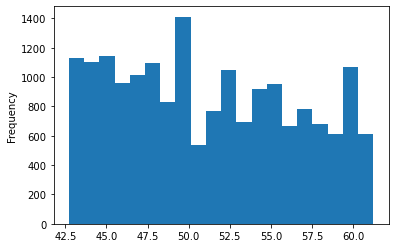

In [27]:
# Visualizando um Histograma simples

df_a['Aluguel_m2'].plot.hist(bins=20)

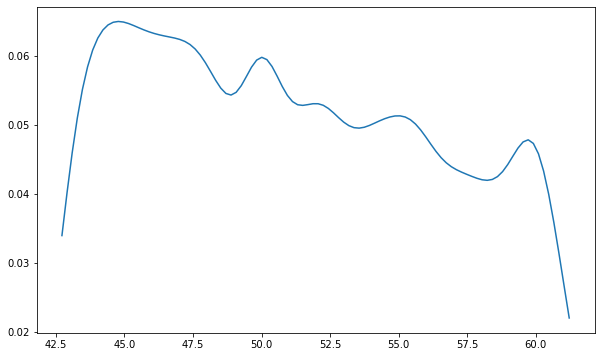

In [29]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = df_a['Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Brooklin'),
  Text(1, 0, 'Vila Clementino'),
  Text(2, 0, 'Paraíso'),
  Text(3, 0, 'Indianópolis'),
  Text(4, 0, 'Campo Belo'),
  Text(5, 0, 'Jabaquara'),
  Text(6, 0, 'Vila Mariana'),
  Text(7, 0, 'Cidade Monções'),
  Text(8, 0, 'Santo Amaro'),
  Text(9, 0, 'Ibirapuera'),
  Text(10, 0, 'Vila Cruzeiro'),
  Text(11, 0, 'Chácara Santo Antônio (Zona Sul)'),
  Text(12, 0, 'Chácara Inglesa'),
  Text(13, 0, 'Vila Uberabinha'),
  Text(14, 0, 'Vila Santa Catarina'),
  Text(15, 0, 'Vila Mascote'),
  Text(16, 0, 'Super Quadra Morumbi'),
  Text(17, 0, 'Moema'),
  Text(18, 0, 'Vila da Saúde'),
  Text(19, 0, 'Vila Andrade'),
  Text(20, 0, 'Vila Guarani (Z Sul)'),
  Text(21, 0, 'Jardim

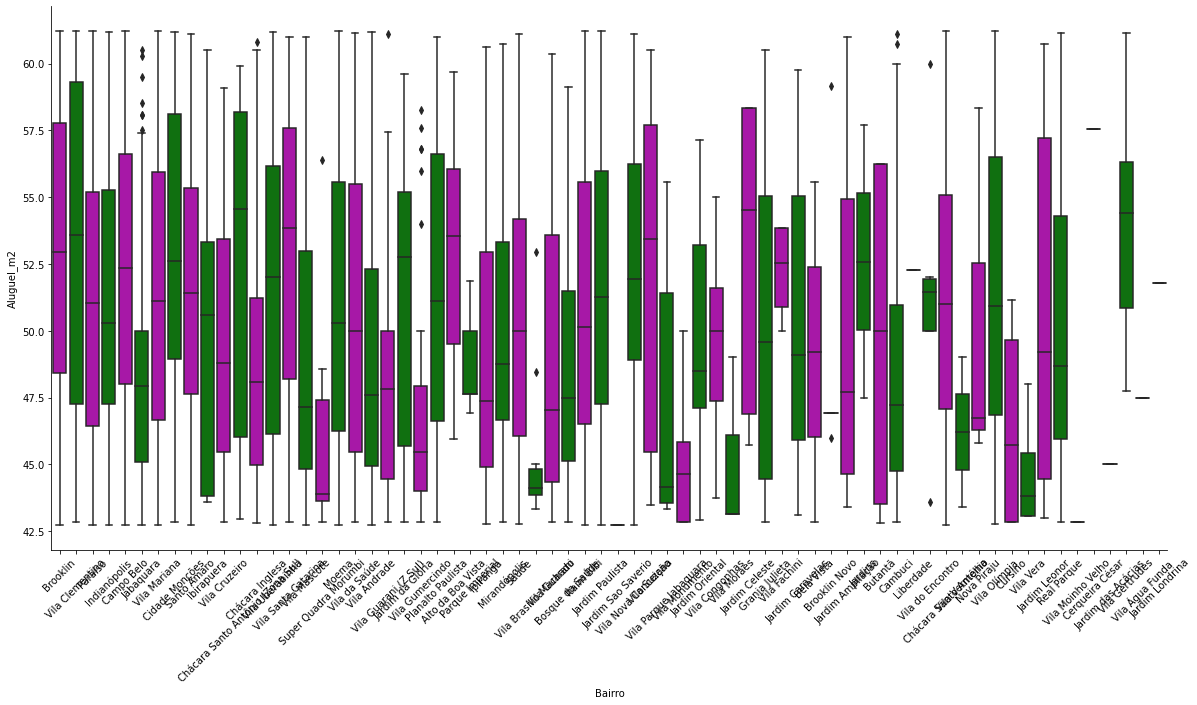

In [32]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_a)
sns.despine()
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Brooklin'),
  Text(1, 0, 'Vila Clementino'),
  Text(2, 0, 'Paraíso'),
  Text(3, 0, 'Indianópolis'),
  Text(4, 0, 'Campo Belo'),
  Text(5, 0, 'Jabaquara'),
  Text(6, 0, 'Vila Mariana'),
  Text(7, 0, 'Cidade Monções'),
  Text(8, 0, 'Santo Amaro'),
  Text(9, 0, 'Ibirapuera'),
  Text(10, 0, 'Vila Cruzeiro'),
  Text(11, 0, 'Chácara Santo Antônio (Zona Sul)'),
  Text(12, 0, 'Chácara Inglesa'),
  Text(13, 0, 'Vila Uberabinha'),
  Text(14, 0, 'Vila Santa Catarina'),
  Text(15, 0, 'Vila Mascote'),
  Text(16, 0, 'Super Quadra Morumbi'),
  Text(17, 0, 'Moema'),
  Text(18, 0, 'Vila da Saúde'),
  Text(19, 0, 'Vila Andrade'),
  Text(20, 0, 'Vila Guarani (Z Sul)'),
  Text(21, 0, 'Jardim

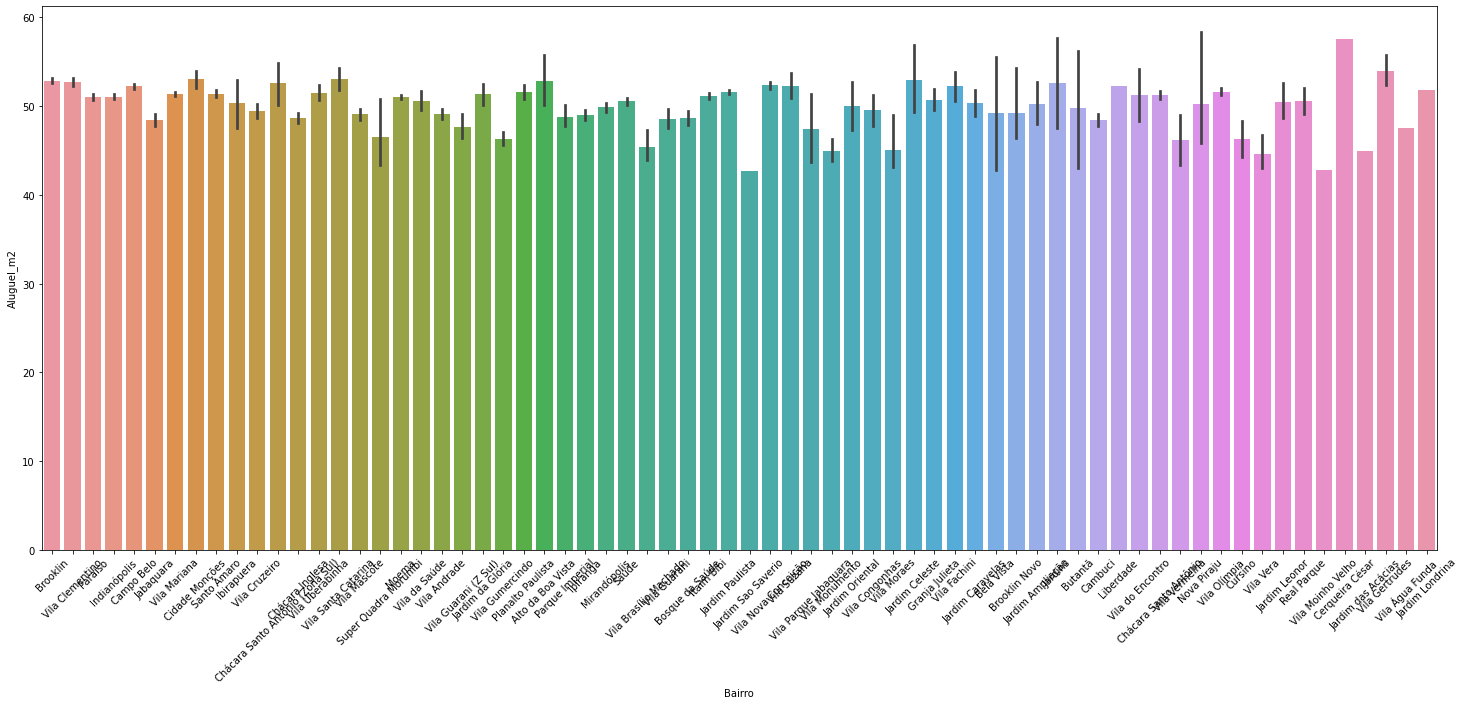

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_a['Bairro'], y = df_a['Aluguel_m2'])
plt.xticks(rotation=45)

#    
#    
### Padronizando os valores para Log

In [15]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

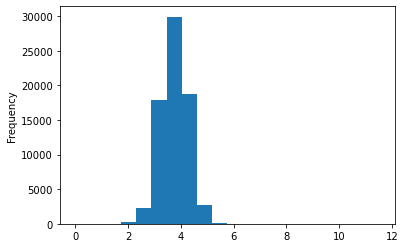

In [16]:
dfzs['log_Aluguel_m2'] = np.log(dfzs['Aluguel_m2'])
dfzs['log_Aluguel_m2'].plot.hist(bins=20)

APARENTEMENTE UM COMPORTAMENTO PURAMENTE NORMAL 

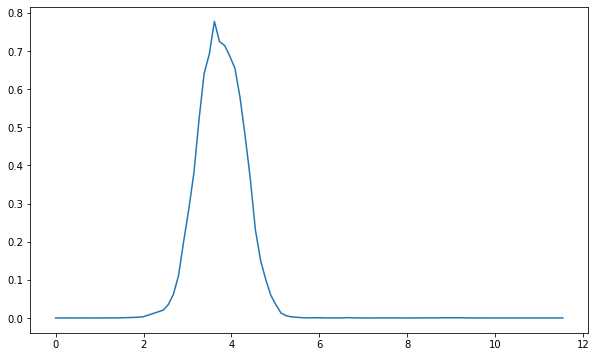

In [26]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

plt.figure(figsize=(10,6))
# estabelecendo os dados
data = dfzs['log_Aluguel_m2']
# Criando o kernel a fim de estimar a probabilidade sobre os valores da array
kde = gaussian_kde(data)
# Valores sobre os quais o kernel será avaliado
dist_space = linspace(min(data), max(data), 100)
# plot da curva kde
plt.plot(dist_space, kde(dist_space))

In [17]:
# definindo os dados
x_zs = dfzs['log_Aluguel_m2']
# calculando a média 
mu_zs = np.mean(x_zs)
# calculando o desvio=padrão (utilizando o padrão para o Python)
std_zs = np.std(x_zs)
print('Média Zona Sul: {}'.format(mu_zs))
print('Desvio Padrão Zona Sul: {}'.format(std_zs))

Média Zona Sul: 3.7619859568602974
Desvio Padrão Zona Sul: 0.5178257234255994


In [18]:
# Coletando a mediana e o Q3 da tabela zona sul

medianalog = np.percentile(dfzs.log_Aluguel_m2, 50)
q3log = np.percentile(dfzs.log_Aluguel_m2, 75)
print(medianalog)
print(q3log)

3.7546671946519394
4.114473933517266


In [19]:
df_log = dfzs[(dfzs.log_Aluguel_m2 >= medianalog) & (dfzs.log_Aluguel_m2 <= q3log)]
print(df_log)

        Id_Oferta       Portal           Bairro      Zona     Cidade   Status  \
0      2469688383  Zap Imóveis         Brooklin  Zona Sul  São Paulo  Aluguel   
1      2470707875  Zap Imóveis  Vila Clementino  Zona Sul  São Paulo  Aluguel   
2      2471846802  Zap Imóveis          Paraíso  Zona Sul  São Paulo  Aluguel   
6      2472894791  Zap Imóveis         Brooklin  Zona Sul  São Paulo  Aluguel   
11     2475393842  Zap Imóveis     Indianópolis  Zona Sul  São Paulo  Aluguel   
...           ...          ...              ...       ...        ...      ...   
72028    93641668  Zap Imóveis       Itaim Bibi  Zona Sul  São Paulo  Aluguel   
72030  2460791409  Zap Imóveis            Moema  Zona Sul  São Paulo  Aluguel   
72034  2460792890  Zap Imóveis            Moema  Zona Sul  São Paulo  Aluguel   
72036  2460793561  Zap Imóveis       Itaim Bibi  Zona Sul  São Paulo  Aluguel   
72041  2470862484  Zap Imóveis       Campo Belo  Zona Sul  São Paulo  Aluguel   

       Valor_Iptu  Valor_Co

In [20]:
df_alog = pd.DataFrame(data=df_log)
display(df_alog)

,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2,log_Aluguel,n_log_Aluguel,log_Aluguel_m2,n_log_Aluguel_m2
0,2469688383,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,220,1100,3400,68,2,0,2,2,50.00,8.131531,-0.027190,3.912023,0.388942
1,2470707875,Zap Imóveis,Vila Clementino,Zona Sul,São Paulo,Aluguel,305,0,6000,140,3,0,2,3,42.86,8.699515,0.744127,3.757939,0.095904
2,2471846802,Zap Imóveis,Paraíso,Zona Sul,São Paulo,Aluguel,721,2332,8000,180,3,1,2,3,44.44,8.987197,1.134797,3.794140,0.164751
6,2472894791,Zap Imóveis,Brooklin,Zona Sul,São Paulo,Aluguel,870,1350,9000,198,3,3,4,5,45.45,9.104980,1.294745,3.816613,0.207490
11,2475393842,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,500,1900,9000,160,2,1,1,1,56.25,9.104980,1.294745,4.029806,0.612943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72028,93641668,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,2100,3700,12000,216,3,3,4,6,55.56,9.392662,1.685415,4.017464,0.589469
72030,2460791409,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,885,2636,10200,200,4,3,3,4,51.00,9.230143,1.464716,3.931826,0.426603
72034,2460792890,Zap Imóveis,Moema,Zona Sul,São Paulo,Aluguel,667,2600,11500,198,3,3,2,4,58.08,9.350102,1.627619,4.061821,0.673829
72036,2460793561,Zap Imóveis,Itaim Bibi,Zona Sul,São Paulo,Aluguel,202,2406,2003,42,1,1,1,1,47.69,7.602401,-0.745742,3.864722,0.298984


In [21]:
# Agrupando as métricas básicas da tabela padronizada dos Bairros da zona sul para aluguel/m2

datatablelog1 = df_alog.groupby(['Zona', 'Bairro']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog1)

min    max       mean       std  size
Zona     Bairro                                                    
Zona Sul Alto da Boa Vista  45.95  59.68  52.854000  4.711148    10
         Bela Vista         42.86  55.56  49.210000  8.980256     2
         Bosque da Saúde    42.86  59.12  48.691345  4.476564   119
         Brooklin           42.74  61.22  52.860204  5.453796  1568
         Brooklin Novo      46.00  59.18  49.200000  5.593818     5
...                           ...    ...        ...       ...   ...
         Vila Vera          43.06  48.00  44.667500  2.330055     4
         Vila Vermelha      43.40  49.02  46.210000  3.973940     2
         Vila da Saúde      42.86  61.14  50.633421  5.700617   114
         Vila do Encontro   43.59  60.00  51.306250  4.469755     8
         Vila Água Funda    47.50  47.50  47.500000       NaN     1

[68 rows x 5 columns]

In [22]:
# Tratando os NaN

datatablelog1.replace(np.nan, 0, inplace=True)
display(datatablelog1)

min    max       mean       std  size
Zona     Bairro                                                    
Zona Sul Alto da Boa Vista  45.95  59.68  52.854000  4.711148    10
         Bela Vista         42.86  55.56  49.210000  8.980256     2
         Bosque da Saúde    42.86  59.12  48.691345  4.476564   119
         Brooklin           42.74  61.22  52.860204  5.453796  1568
         Brooklin Novo      46.00  59.18  49.200000  5.593818     5
...                           ...    ...        ...       ...   ...
         Vila Vera          43.06  48.00  44.667500  2.330055     4
         Vila Vermelha      43.40  49.02  46.210000  3.973940     2
         Vila da Saúde      42.86  61.14  50.633421  5.700617   114
         Vila do Encontro   43.59  60.00  51.306250  4.469755     8
         Vila Água Funda    47.50  47.50  47.500000  0.000000     1

[68 rows x 5 columns]

In [23]:
# Agrupando as métricas de acordo com os bairros e número de quartos (considerados de 4 para baixo)


datatablelog2 = df_alog.groupby(['Zona', 'Bairro', 'Dormitorios']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
display(datatablelog2)

min    max       mean       std  \
Zona     Bairro            Dormitorios                                      
Zona Sul Alto da Boa Vista 1            54.29  55.07  54.680000  0.551543   
                           2            52.83  52.83  52.830000       NaN   
                           4            45.95  59.68  52.335714  5.640635   
         Bela Vista        2            42.86  55.56  49.210000  8.980256   
         Bosque da Saúde   1            42.86  58.70  48.066250  4.194440   
...                                       ...    ...        ...       ...   
         Vila da Saúde     2            42.86  60.38  48.476129  4.771936   
                           3            43.56  54.26  46.702000  4.357502   
         Vila do Encontro  1            43.59  60.00  51.347143  4.826271   
                           2            51.02  51.02  51.020000       NaN   
         Vila Água Funda   1            47.50  47.50  47.500000       NaN   

                                        size  
Zona     Bairro            Dormitorios        
Zona Sul Alto da Boa Vista 1               2  
                           2               1  
                           4               7  
         Bela Vista        2               2  
         Bosque da Saúde   1              32  
...                                      ...  
         Vila da Saúde     2              62  
                           3               5  
         Vila do Encontro  1               7  
                           2               1  
         Vila Água Funda   1               1  

[202 rows x 5 columns]

In [24]:
datatablelog2.replace(np.nan, 0, inplace=True)
display(datatablelog2)

min    max       mean       std  \
Zona     Bairro            Dormitorios                                      
Zona Sul Alto da Boa Vista 1            54.29  55.07  54.680000  0.551543   
                           2            52.83  52.83  52.830000  0.000000   
                           4            45.95  59.68  52.335714  5.640635   
         Bela Vista        2            42.86  55.56  49.210000  8.980256   
         Bosque da Saúde   1            42.86  58.70  48.066250  4.194440   
...                                       ...    ...        ...       ...   
         Vila da Saúde     2            42.86  60.38  48.476129  4.771936   
                           3            43.56  54.26  46.702000  4.357502   
         Vila do Encontro  1            43.59  60.00  51.347143  4.826271   
                           2            51.02  51.02  51.020000  0.000000   
         Vila Água Funda   1            47.50  47.50  47.500000  0.000000   

                                        size  
Zona     Bairro            Dormitorios        
Zona Sul Alto da Boa Vista 1               2  
                           2               1  
                           4               7  
         Bela Vista        2               2  
         Bosque da Saúde   1              32  
...                                      ...  
         Vila da Saúde     2              62  
                           3               5  
         Vila do Encontro  1               7  
                           2               1  
         Vila Água Funda   1               1  

[202 rows x 5 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 

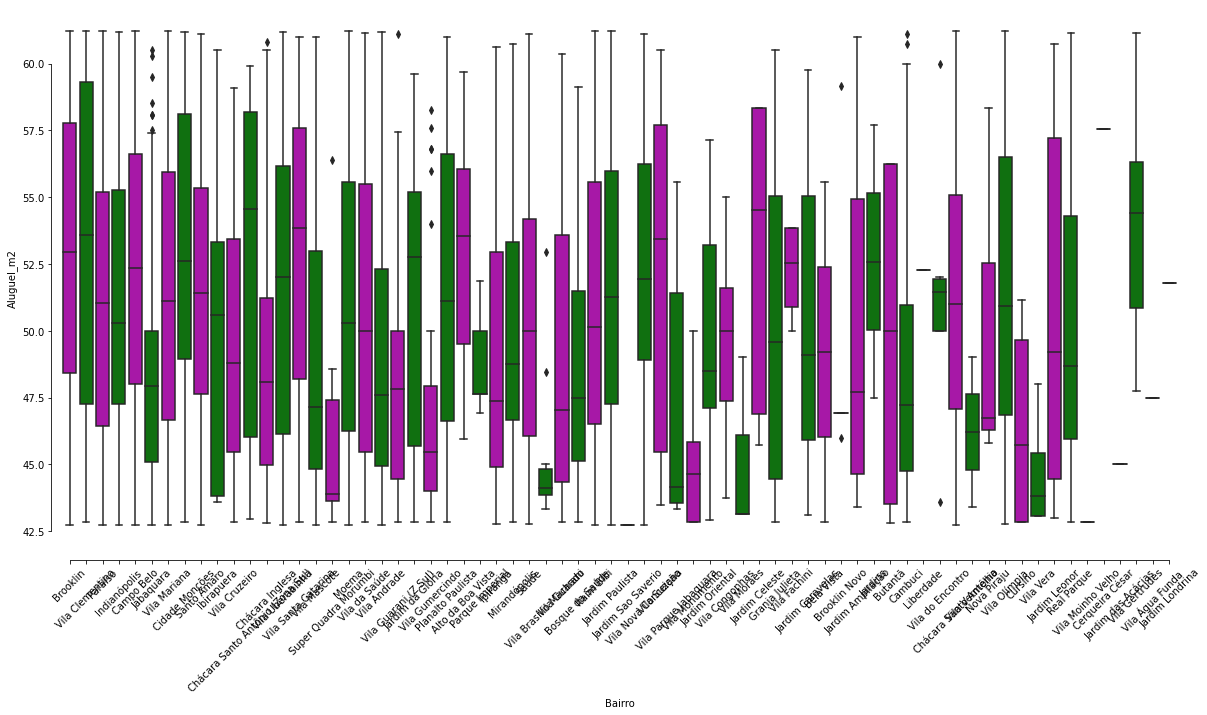

In [35]:
# Boxplot com os bairros e o algugeul por m2


plt.figure(figsize=(20,10))

sns.boxplot(x="Bairro", y="Aluguel_m2", palette=["m", "g"],
            data=df_alog)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Brooklin'),
  Text(1, 0, 'Vila Clementino'),
  Text(2, 0, 'Paraíso'),
  Text(3, 0, 'Indianópolis'),
  Text(4, 0, 'Campo Belo'),
  Text(5, 0, 'Jabaquara'),
  Text(6, 0, 'Vila Mariana'),
  Text(7, 0, 'Cidade Monções'),
  Text(8, 0, 'Santo Amaro'),
  Text(9, 0, 'Ibirapuera'),
  Text(10, 0, 'Vila Cruzeiro'),
  Text(11, 0, 'Chácara Santo Antônio (Zona Sul)'),
  Text(12, 0, 'Chácara Inglesa'),
  Text(13, 0, 'Vila Uberabinha'),
  Text(14, 0, 'Vila Santa Catarina'),
  Text(15, 0, 'Vila Mascote'),
  Text(16, 0, 'Super Quadra Morumbi'),
  Text(17, 0, 'Moema'),
  Text(18, 0, 'Vila da Saúde'),
  Text(19, 0, 'Vila Andrade'),
  Text(20, 0, 'Vila Guarani (Z Sul)'),
  Text(21, 0, 'Jardim

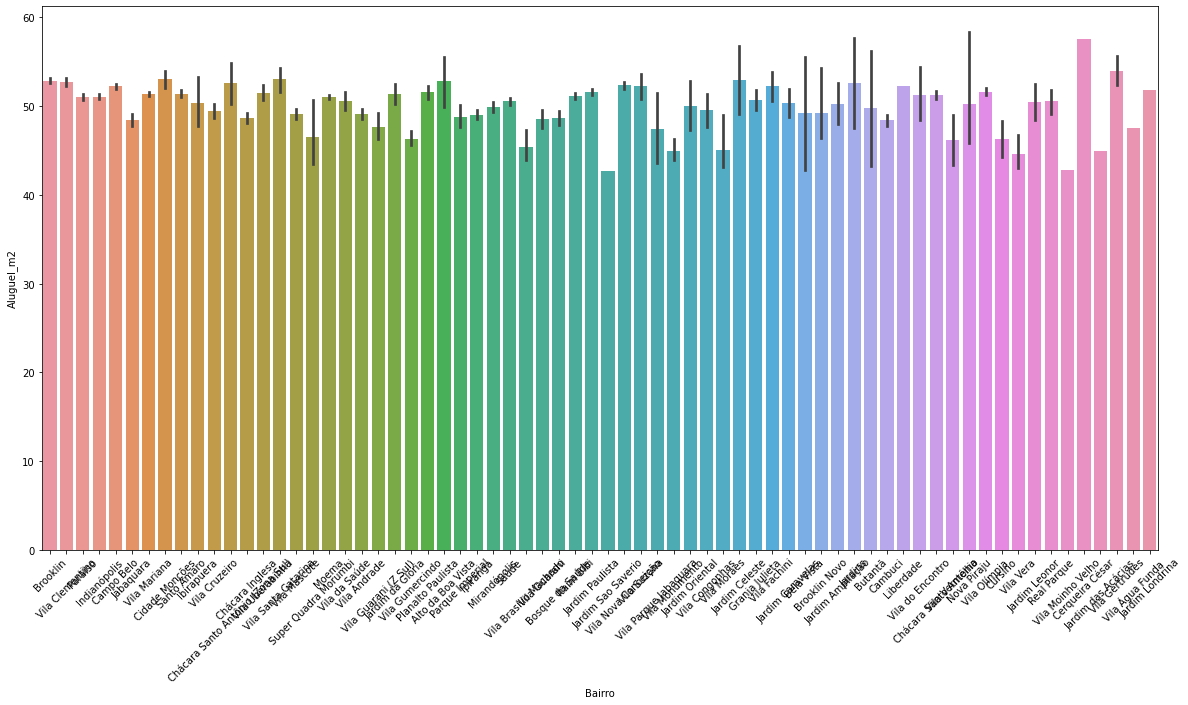

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_alog['Bairro'], y = df_alog['Aluguel_m2'])
plt.xticks(rotation=45)